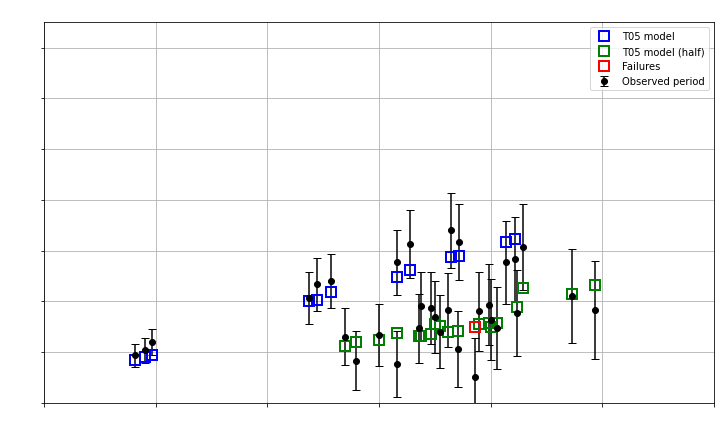

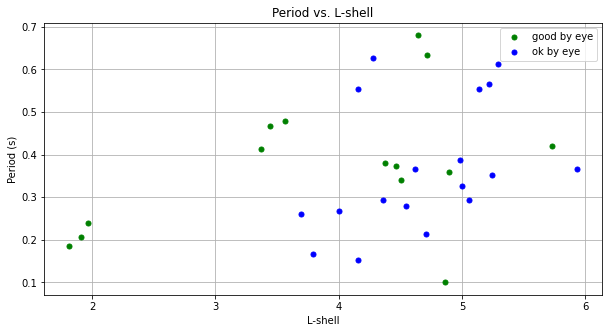

In [11]:
'''
Period vs. L-shell
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


plt.figure(figsize = (12, 7))
data = pd.read_csv("events_analysis_mar13.csv")
period_error = lambda L: 0.07224529197469778*L -0.04195283140727132
error_for_all_data = 1.05*period_error(data.L)/2
fullper = np.zeros(len(data))
for j in range(len(data)):
    if (abs(data.per[j] - data.tb[j]) <= error_for_all_data[j]) & \
    ((abs(data.per[j] - data.tb[j]/2) <= error_for_all_data[j])):
        # Both conditions are true, so figure out which is closer
        if abs(data.per[j] - data.tb[j]) >= abs(data.per[j] - data.tb[j])/2:
            fullper[j] = 1
        else:
            fullper[j] = 2
    elif abs(data.per[j] - data.tb[j]) <= error_for_all_data[j]:
        fullper[j] = 1
    elif abs(data.per[j] - data.tb[j]/2) <= error_for_all_data[j]:
        fullper[j] = 2

error_for_the_data = period_error(data.L[data.max_yn != 0])/2
plt.errorbar(data.L[data.max_yn != 0], data.per[data.max_yn != 0], yerr=error_for_the_data, fmt='o', capsize=4, \
             label='Observed period', color='black')
plt.plot(data.L[(data.max_yn != 0) & (fullper == 1)], data.tb[(data.max_yn != 0) & (fullper == 1)], \
          'bs',  markeredgewidth = 2, markersize = 10, markerfacecolor="none", label="T05 model")
plt.plot(data.L[(data.max_yn != 0) & (fullper == 2)], data.tb[(data.max_yn != 0) & (fullper == 2)]/2, \
         'gs',   markeredgewidth = 2, markersize = 10, markerfacecolor="none", label="T05 model (half)")
plt.plot(data.L[(data.max_yn != 0) & (fullper == 0)], data.tb[(data.max_yn != 0) & (fullper == 0)]/2, \
         'rs',   markeredgewidth = 2, markersize = 10, markerfacecolor="none", label="Failures")


plt.legend()
plt.grid()
plt.title("Period vs. L-shell (\"good\" by eye)", color="white")
plt.xlabel("L-shell", color="white")
plt.ylabel("Period (s)", color="white")
plt.xticks(color='white')
plt.yticks(color='white')
plt.ylim(0, 1.5)
plt.xlim(1, 7)

plt.figure(figsize=(10,5))
plt.plot(data.L[data.max_yn == 1], data.per[data.max_yn == 1], 'g.', label="good by eye",markersize=10)
plt.plot(data.L[data.max_yn == 2], data.per[data.max_yn == 2], 'b.', label="ok by eye",markersize=10)
# plt.plot(data.L[data.max_yn == 0], data.per[data.max_yn == 0], 'r.', label="bad by eye",markersize=10)
plt.grid()
plt.title("Period vs. L-shell")
plt.xlabel("L-shell")
plt.ylabel("Period (s)")
plt.legend()

In [5]:
fullper

array([1., 1., 0., 1., 0., 0., 2., 1., 1., 0., 1., 1., 1., 2., 1., 0., 1.,
       0., 1., 1., 2., 1., 2., 0., 1., 1., 1., 1., 1., 0., 0., 2., 1., 0.,
       2., 2., 1., 1., 1., 2., 2., 0., 1., 0., 0., 2., 0., 1., 1., 0., 1.,
       2., 0., 2.])

<ipython-input-3-7893b4b28a3f>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Geographic Location of Events')

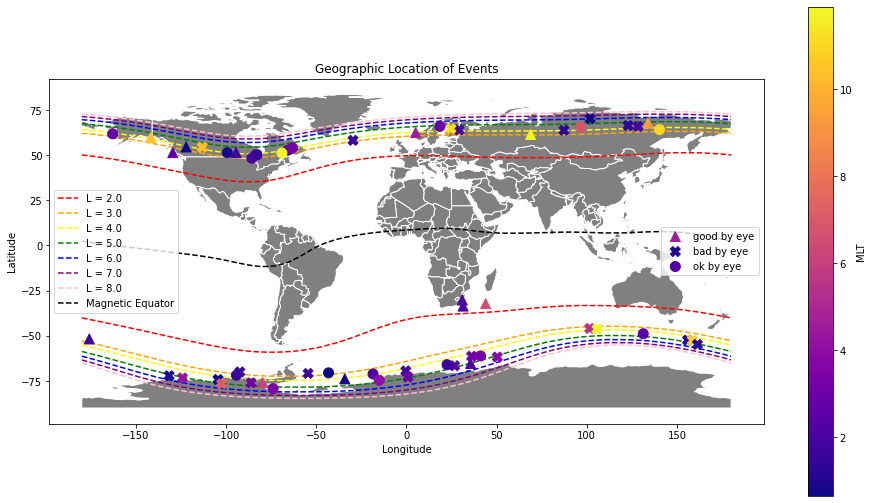

In [3]:
'''
PLOTTING THE HOES
'''

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

lgrid = pd.read_csv('Lgrid.dat', delimiter='\t', header=None)
data = pd.read_csv("events_analysis_mar13.csv")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(16, 9))
world.plot(ax=ax, color='gray', edgecolor='white')

def name_line(col_num):
    if col_num < 15:
        nm = "L = " + str(col_num)
    elif col_num == 30:
        nm = "Magnetic Equator"
    return nm

col_list = ["red", "orange", "yellow", "green", "blue", "purple", "pink", "black"]
for i in np.arange(1, 30, 2):
    min_pos = np.argmin(lgrid.iloc[:,i])
    lat = np.concatenate(([lgrid.iloc[min_pos:,i-1], lgrid.iloc[:min_pos,i-1]]))
    lon = np.concatenate(([lgrid.iloc[min_pos:,i], lgrid.iloc[:min_pos,i]]))
    if i < 15:
        col_idx = int((i - 1)/2)
        ln_name = name_line((i+3)/2)
    elif (i >= 15) & (i < 28):
        col_idx = int((i - 15)/2)
        ln_name = None
    else:
        col_idx = len(col_list)-1
        ln_name = "Magnetic Equator"
    ax.plot(lon, lat, '--', color=col_list[col_idx], label=ln_name, zorder=5)
fleg = ax.legend()
ax.add_artist(fleg)

good_byeye = np.where(data.max_yn == 1)[0]
bad_byeye = np.where(data.max_yn == 0)[0]
ok_byeye = np.where(data.max_yn == 2)[0]

events = ax.scatter(data.lon[good_byeye], data.lat[good_byeye], s=100, c=data.MLT[good_byeye],
                    marker='^', label='good by eye', cmap='plasma', zorder=50)
eventsb = ax.scatter(data.lon[bad_byeye], data.lat[bad_byeye], s=100, c=data.MLT[bad_byeye], 
                     marker='X', label='bad by eye', cmap='plasma', zorder = 50)
eventso = ax.scatter(data.lon[ok_byeye], data.lat[ok_byeye], s=100, c=data.MLT[ok_byeye], 
                     marker='o', label='ok by eye', cmap='plasma', zorder = 50)
ax.legend(handles=[events, eventsb, eventso], loc='right')
cbar = fig.colorbar(events)
cbar.set_label('MLT')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Geographic Location of Events")

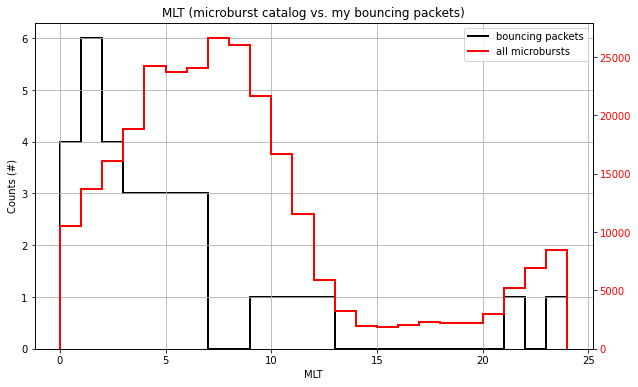

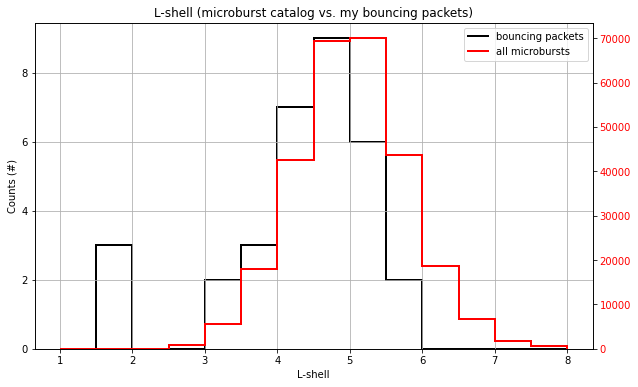

In [6]:
'''
Histograms (swirly eye emoji)
'''

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# plt.figure(figsize = (12, 7))
data = pd.read_csv("events_analysis_mar13.csv")
ref = pd.read_csv("microburst_catalog_00.txt", sep=",")


fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx() 

factor = len(ref)/len(data)
# plt.figure(figsize=(8,5))
counts_all, bins_all = np.histogram(data.MLT[data.max_yn != 0], bins=24, range=(0,24))
counts_ref, bins_ref = np.histogram(ref.MLT, bins=24, range=(0,24))
bps = ax1.stairs(counts_all, bins_all, label='bouncing packets', linewidth=2, color="black")
am = ax2.stairs(counts_ref, bins_ref, label='all microbursts', linewidth=2, color="red")
ax2.tick_params(axis='y', labelcolor="red")
# factor = len(ref)/len(data[data.max_yn == 1])
# counts_some, bins_some = np.histogram(data.MLT[data.max_yn == 1], bins=24, range=(0,24))
# plt.stairs(counts_some, bins_some, label='only good ones', linewidth=2)
# plt.stairs(counts_some*factor, bins_some, linestyle = '--', label='only good ones (normalized)', linewidth=2)
ax1.legend(handles=[bps, am])
ax1.set_title('MLT (microburst catalog vs. my bouncing packets)')
ax1.set_xlabel('MLT')
ax1.set_ylabel('Counts (#)')
ax1.grid()


### L-shell
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx() 

factor = len(ref)/len(data)
# plt.figure(figsize=(8,5))
counts_all, bins_all = np.histogram(data.L[data.max_yn != 0], bins=14, range=(1,8))
counts_ref, bins_ref = np.histogram(ref.L_Shell, bins=14, range=(1,8))
bps = ax1.stairs(counts_all, bins_all, label='bouncing packets', linewidth=2, color="black")
am = ax2.stairs(counts_ref, bins_ref, label='all microbursts', linewidth=2, color="red")
ax2.tick_params(axis='y', labelcolor="red")
# factor = len(ref)/len(data[data.max_yn == 1])
# counts_some, bins_some = np.histogram(data.MLT[data.max_yn == 1], bins=24, range=(0,24))
# plt.stairs(counts_some, bins_some, label='only good ones', linewidth=2)
# plt.stairs(counts_some*factor, bins_some, linestyle = '--', label='only good ones (normalized)', linewidth=2)
ax1.legend(handles=[bps, am])
ax1.set_title('L-shell (microburst catalog vs. my bouncing packets)')
ax1.set_xlabel('L-shell')
ax1.set_ylabel('Counts (#)')
ax1.grid()



In [7]:
np.where(data.L < 2)[0]

array([18, 31, 32], dtype=int64)